### SALES PREDICTION USING PYTHON

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Load the dataset
data = pd.read_csv(r"C:\Users\srira\Downloads\Optifyx Technology Internship\Advertising.csv")

In [4]:
# Drop unnecessary column
data = data.drop(columns=['Unnamed: 0'])

In [5]:
# Exploratory Data Analysis (EDA)
print("Dataset Head:")
print(data.head())

Dataset Head:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [6]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [7]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


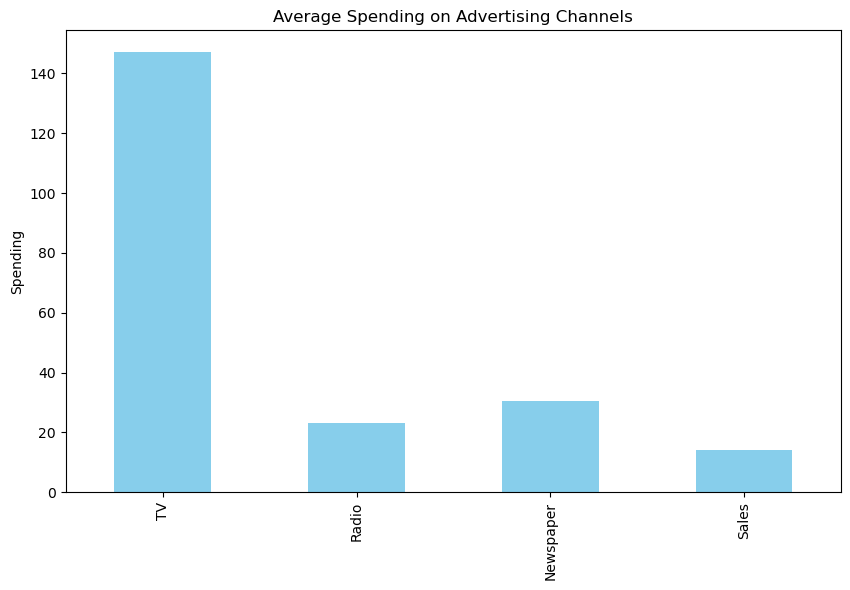

In [8]:
# Data Visualization
# Bar Graphs
plt.figure(figsize=(10, 6))
data.mean().plot(kind='bar', color='skyblue')
plt.title('Average Spending on Advertising Channels')
plt.ylabel('Spending')
plt.show()

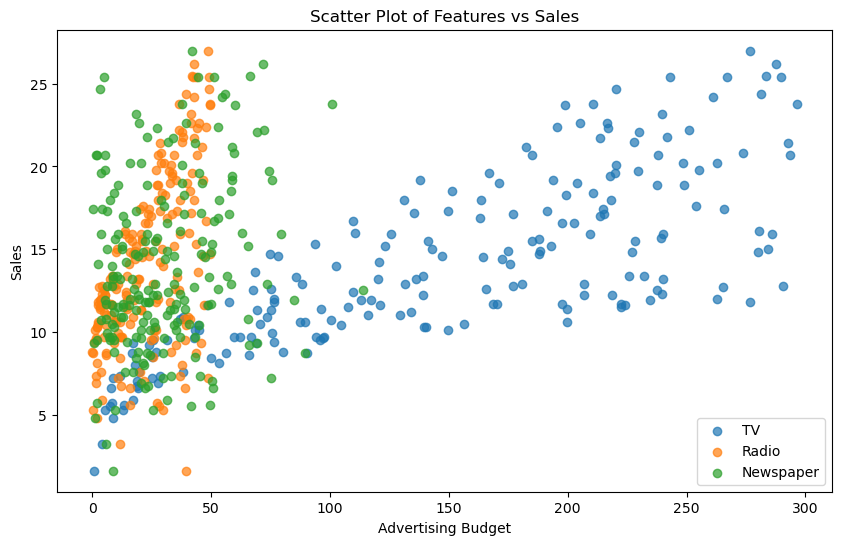

In [9]:
# Scatter Plots
plt.figure(figsize=(10, 6))
for column in ['TV', 'Radio', 'Newspaper']:
    plt.scatter(data[column], data['Sales'], label=column, alpha=0.7)
plt.title('Scatter Plot of Features vs Sales')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

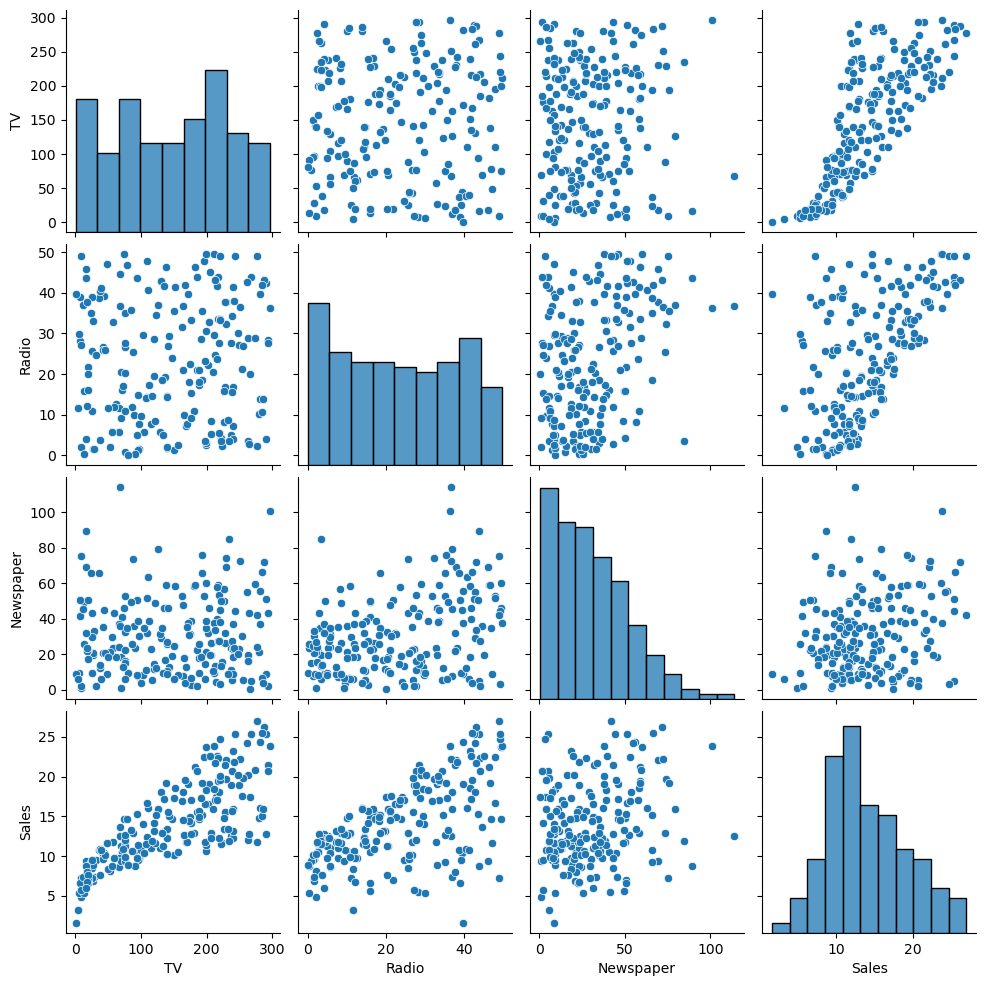

In [10]:
# Pairplot
sns.pairplot(data)
plt.show()

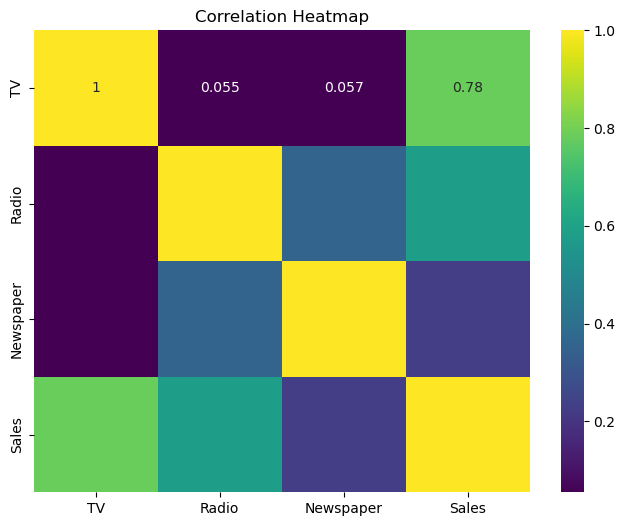

In [12]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


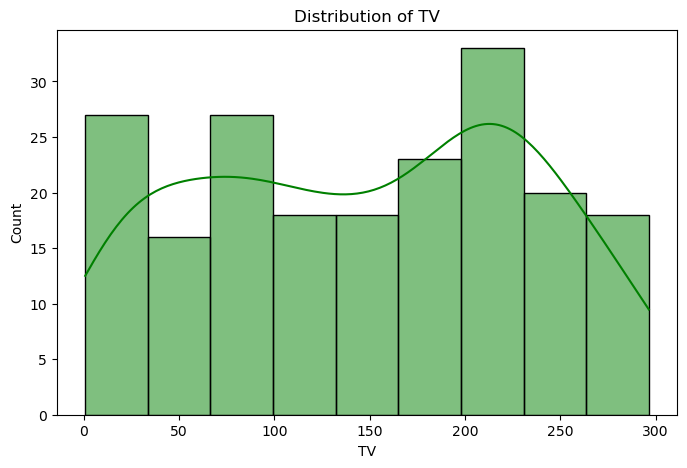

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


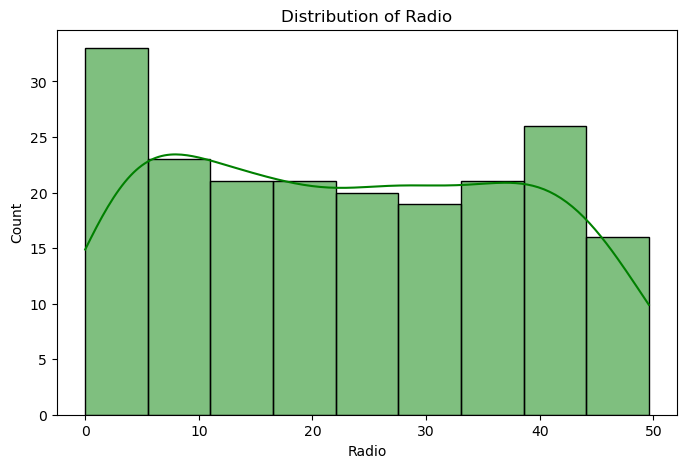

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


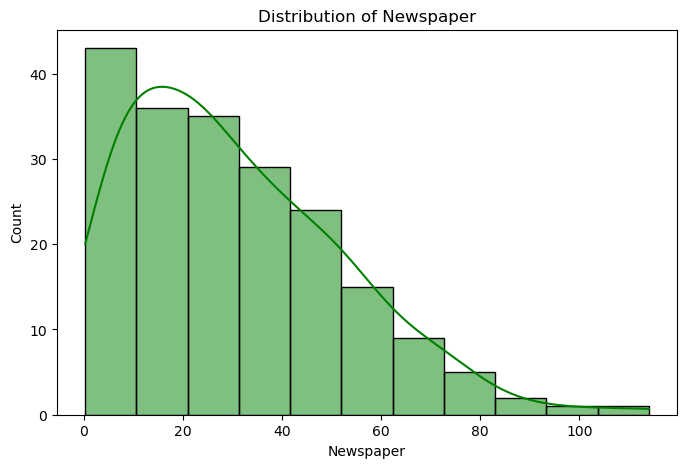

C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


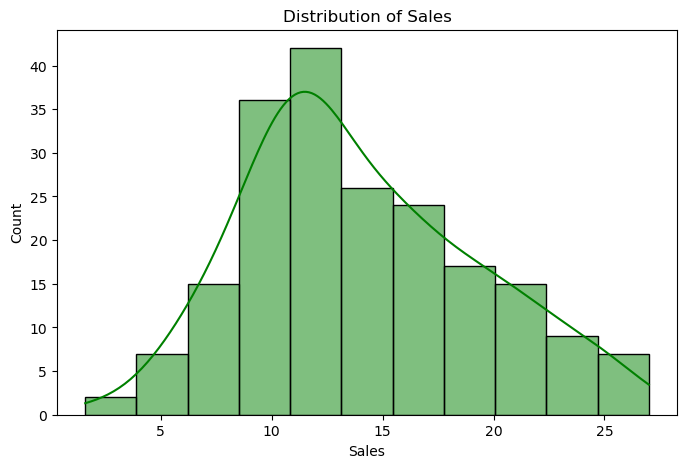

In [15]:
# Distribution Plots
for column in data.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.show()

In [16]:
# Splitting Data
X = data.drop(columns=['Sales'])
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
mlr_predictions = mlr_model.predict(X_test)

In [18]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [19]:
# XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

In [20]:
# Performance Metrics Function
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - n_features - 1)
    return mse, r2, adjusted_r2

In [21]:
# Calculate Metrics
mlr_mse, mlr_r2, mlr_adjusted_r2 = calculate_metrics(y_test, mlr_predictions, X.shape[1])
rf_mse, rf_r2, rf_adjusted_r2 = calculate_metrics(y_test, rf_predictions, X.shape[1])
xgb_mse, xgb_r2, xgb_adjusted_r2 = calculate_metrics(y_test, xgb_predictions, X.shape[1])

In [22]:
# Print Metrics
print("Multiple Linear Regression Metrics:")
print(f"MSE: {mlr_mse}, R²: {mlr_r2}, Adjusted R²: {mlr_adjusted_r2}")

print("\nRandom Forest Metrics:")
print(f"MSE: {rf_mse}, R²: {rf_r2}, Adjusted R²: {rf_adjusted_r2}")

print("\nXGBoost Metrics:")
print(f"MSE: {xgb_mse}, R²: {xgb_r2}, Adjusted R²: {xgb_adjusted_r2}")

Multiple Linear Regression Metrics:
MSE: 3.1740973539761015, R²: 0.8994380241009121, Adjusted R²: 0.8910578594426548

Random Forest Metrics:
MSE: 0.5907322499999988, R²: 0.9812843792541843, Adjusted R²: 0.979724744192033

XGBoost Metrics:
MSE: 0.8689325216764425, R²: 0.9724704186551494, Adjusted R²: 0.9701762868764119


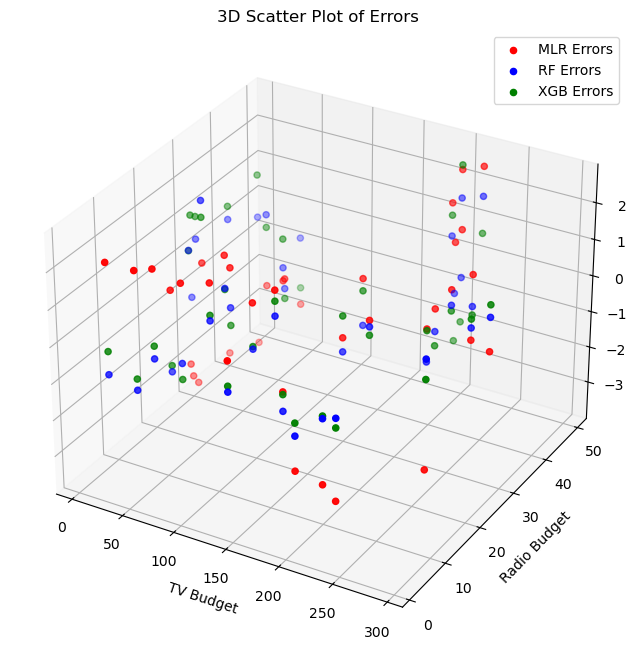

In [23]:
# 3D Scatter Plot for Error Analysis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['TV'], X_test['Radio'], y_test - mlr_predictions, label='MLR Errors', c='r')
ax.scatter(X_test['TV'], X_test['Radio'], y_test - rf_predictions, label='RF Errors', c='b')
ax.scatter(X_test['TV'], X_test['Radio'], y_test - xgb_predictions, label='XGB Errors', c='g')
ax.set_title('3D Scatter Plot of Errors')
ax.set_xlabel('TV Budget')
ax.set_ylabel('Radio Budget')
ax.set_zlabel('Residuals')
plt.legend()
plt.show()

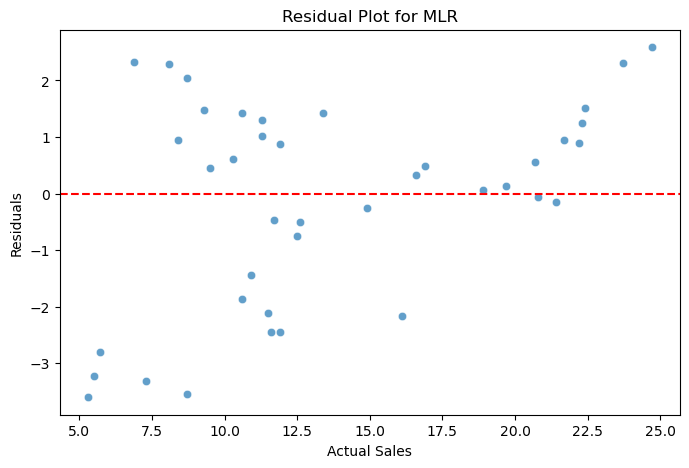

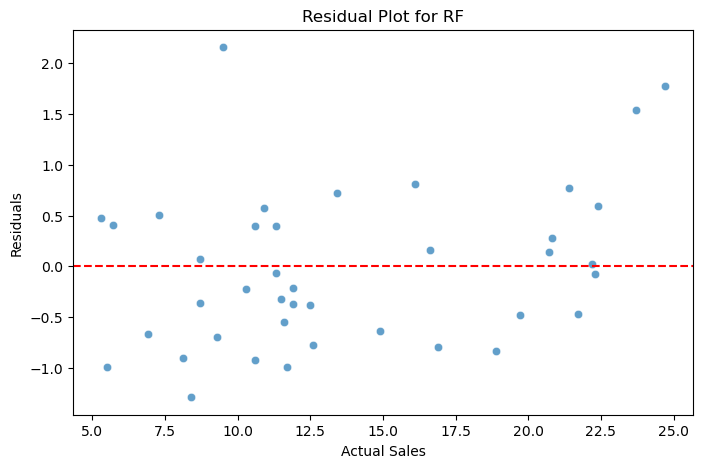

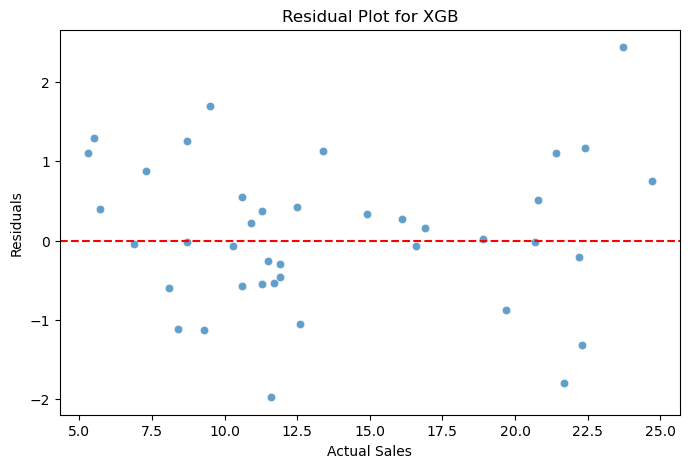

In [24]:
# Residual Plots for Error Analysis
for model_name, residuals in zip(['MLR', 'RF', 'XGB'],
                                 [y_test - mlr_predictions, y_test - rf_predictions, y_test - xgb_predictions]):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Actual Sales')
    plt.ylabel('Residuals')
    plt.show()

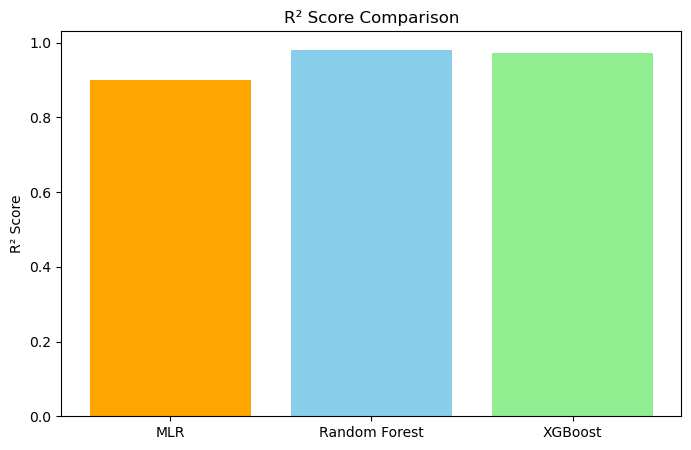

In [26]:
# Compare R² Scores of Algorithms
models = ['MLR', 'Random Forest', 'XGBoost']
scores = [mlr_r2, rf_r2, xgb_r2]
plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=['orange', 'skyblue', 'lightgreen'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.show()